In [6]:
import pandas as pd

In [7]:
covid19 = pd.read_csv('C:\\Users\\User-13346\\Downloads\\2019_nCoV_data.csv')

In [8]:
covid19

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1,0,0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1,0,0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1,0,0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1,0,1


In [9]:
covid19.isnull().any()

Sno               False
Date              False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [10]:
covid19['Province/State']=covid19['Province/State'].fillna('Others')
covid19

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1,0,0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1,0,0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1,0,0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1,0,1


In [11]:
covid19.isnull().any()

Sno               False
Date              False
Province/State    False
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [12]:
covid1 = covid19[ covid19['Country']!='Others']
covid2 = covid1[ covid1['Country']!='Thailand']
covid3 = covid2[ covid2['Country']!='Japan']
covid4 = covid3[ covid3['Country']!='Vietnam']
covid5 = covid4[ covid4['Country']!='China']

In [13]:
cv19 = set(covid5['Country'])

In [14]:
Confirmed = []
Deaths = []
Recovered = []
Country = []
for i in cv19:
    C = 0
    D = 0
    R = 0
    for j in range(len(covid19)):
        if i == covid19['Country'][j]:
            C+=covid19['Confirmed'][j]
            D+=covid19['Deaths'][j]
            R+=covid19['Recovered'][j]
    Country.append(i)  
    Confirmed.append(C) 
    Deaths.append(D) 
    Recovered.append(R) 

In [15]:
Newdata =  {'Country': Country,'Confirmed':Confirmed,'Deaths':Deaths,'Recovered' :Recovered}

In [16]:
df_covid19 = pd.DataFrame.from_dict(Newdata)
df_covid19

,Country,Confirmed,Deaths,Recovered
0,Sri Lanka,22,0,10
1,Finland,20,0,7
2,Egypt,4,0,0
3,Nepal,24,0,6
4,United Arab Emirates,126,0,15
5,US,250,0,27
6,Russia,36,0,12
7,Italy,49,0,0
8,South Korea,444,0,63
9,Australia,284,0,70


In [17]:
df_covid19.drop(df_covid19[df_covid19['Country'] == 'Mainland China' ].index, inplace = True)
df_covid19

,Country,Confirmed,Deaths,Recovered
0,Sri Lanka,22,0,10
1,Finland,20,0,7
2,Egypt,4,0,0
3,Nepal,24,0,6
4,United Arab Emirates,126,0,15
5,US,250,0,27
6,Russia,36,0,12
7,Italy,49,0,0
8,South Korea,444,0,63
9,Australia,284,0,70


# Plot graph

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Bar chart

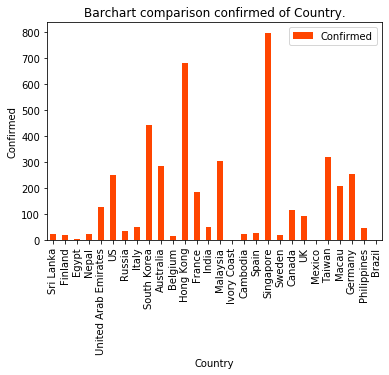

In [19]:
df_covid19.plot(kind='bar' ,x='Country',y='Confirmed',color='orangered')
plt.title('Barchart comparison confirmed of Country.')
plt.ylabel('Confirmed')
plt.show()

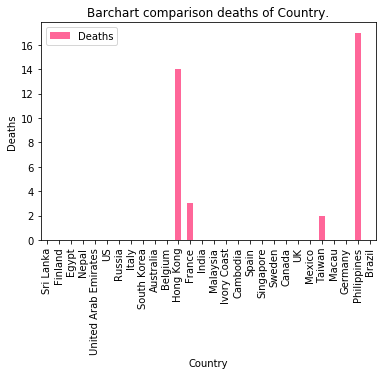

In [20]:
df_covid19.plot(kind='bar' ,x='Country',y='Deaths',color='#FF6699')
plt.title('Barchart comparison deaths of Country.')
plt.ylabel('Deaths')
plt.show()

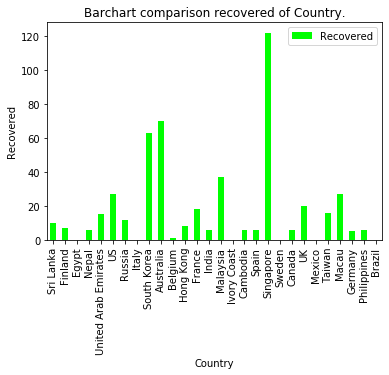

In [21]:
df_covid19.plot(kind='bar' ,x='Country',y='Recovered',color='#00FF00')
plt.title('Barchart comparison recovered of Country.')
plt.ylabel('Recovered')
plt.show()

# Line chart

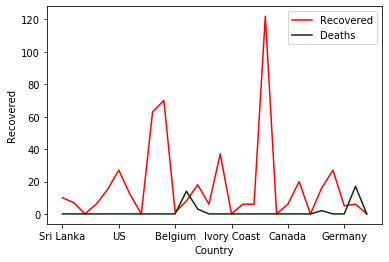

In [22]:
ax = plt.gca() 
df_covid19.plot(kind='line',x='Country',y='Recovered',color='#FF0000',ax=ax) 
df_covid19.plot(kind='line',x='Country',y='Deaths', color='#003300', ax=ax) 
plt.ylabel('Recovered')
plt.show() 

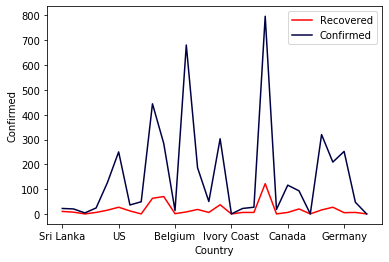

In [25]:
ax = plt.gca() 
df_covid19.plot(kind='line',x='Country',y='Recovered',color='#FF0000',ax=ax) 
df_covid19.plot(kind='line',x='Country',y='Confirmed', color='#000044', ax=ax) 
plt.ylabel('Confirmed')
plt.show() 

# Scatter plot (ดูการกระจายขงข้อมูล)

เลือกดู Singapore เนื่องจากว่าSingaporeมีค่าConfirmedมากที่สุด

In [35]:
df_covid19['Country'] = 'Singapore'
df_covid19

,Country,Confirmed,Deaths,Recovered
0,Singapore,22,0,10
1,Singapore,20,0,7
2,Singapore,4,0,0
3,Singapore,24,0,6
4,Singapore,126,0,15
5,Singapore,250,0,27
6,Singapore,36,0,12
7,Singapore,49,0,0
8,Singapore,444,0,63
9,Singapore,284,0,70


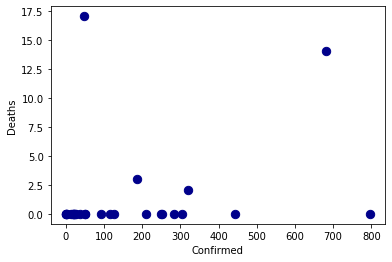

In [41]:
ax1 = df_covid19.plot.scatter(x='Confirmed',y='Deaths',c='DarkBlue',s=70)

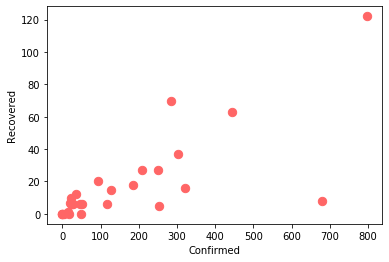

In [42]:
ax2 = df_covid19.plot.scatter(x='Confirmed',y='Recovered',c='#FF6666',s=70)